<a href="https://colab.research.google.com/github/asheerali/piaic_neuralnetworks/blob/main/DL_3_regression_problem_and_cost_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io

In [18]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [36]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

In [37]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [47]:
#Extracting features and labels as numpy arrays separately
x= df['Height'].values
X = df[['Height']].values
y_true = df[['Weight']].values

In [48]:
print(X.shape)
print(x.shape)

(10000, 1)
(10000,)


In [31]:
def line(x, w=0, b=0):
  return w*x + b

#loss function
def mean_squared_error(y_true, y_predict):
  s = (y_true-y_predict)**2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

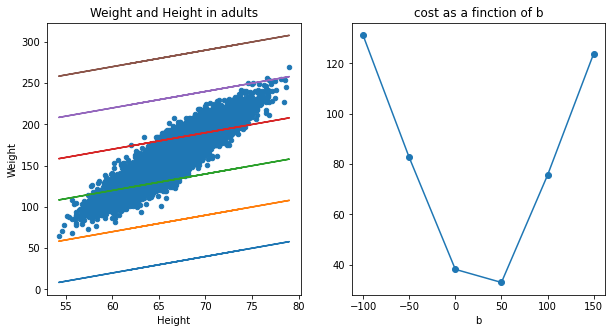

In [32]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind= 'scatter',x= 'Height', y='Weight', title= 'Weight and Height in adults', ax=ax1)
bs = np.array([-100, -50, 0, 50, 100, 150])

mses = []
for b in bs:
  y_pred = line(X, w=2, b=b)
  mse = mean_squared_error(y_true, y_pred)
  mses.append(mse)
  plt.plot(X, y_pred)

ax2 = plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('cost as a finction of b')
plt.xlabel('b')

**Linear Regression with Keras**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [41]:
X.shape

(10000, 1)

In [42]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [52]:
model = Sequential()
model.add(Dense(1,input_shape= (1,)))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(Adam(learning_rate=0.8),'mean_squared_error')

In [56]:
model.fit(X,y_true,epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 913us/step - loss: 631.7540
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 518.5507
Epoch 3/40
313/313 [==============================] - 0s 940us/step - loss: 476.8571
Epoch 4/40
313/313 [==============================] - 0s 920us/step - loss: 421.8055
Epoch 5/40
313/313 [==============================] - 0s 927us/step - loss: 382.9073
Epoch 6/40
313/313 [==============================] - 0s 921us/step - loss: 347.4977
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 311.8525
Epoch 8/40
313/313 [==============================] - 0s 942us/step - loss: 283.5353
Epoch 9/40
313/313 [==============================] - 0s 947us/step - loss: 265.0703
Epoch 10/40
313/313 [==============================] - 0s 905us/step - loss: 240.5964
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 231.5838
Epoch 12/40
313/313 [==============================] - 0s 888us/step 

In [57]:
y_pred = model.predict(X)

In [58]:
y_pred

array([[218.09613],
       [179.20807],
       [220.11603],
       ...,
       [141.4808 ],
       [181.14539],
       [126.711  ]], dtype=float32)

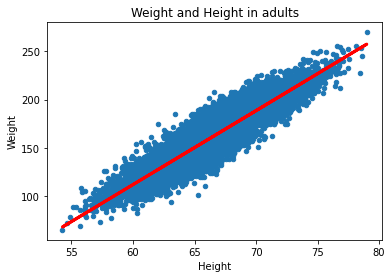

In [60]:
df.plot(kind= 'scatter',x= 'Height', y='Weight', title= 'Weight and Height in adults')
plt.plot(X, y_pred, color = 'red', linewidth = 3)

In [62]:
w,b = model.get_weights()

In [63]:
w,b

(array([[7.6776342]], dtype=float32), array([-348.87427], dtype=float32))

In [73]:
model.predict([[67.0018]])

array([[165.54108]], dtype=float32)